# Table of contents
1. [Introduction](#intro)
2. [Data cleaning](#clean)  
    2.1 [Duplicates](#dupli)  
    2.2 [Missing values](#missing)
3. [Exploration](#explore)  
    3.1 [Categorical variables](#cat)  
    3.2 [Numerical variables](#num)  
    3.3 [Correlation plot](#cor)  
    3.4 [Check normality](#norm)  
4. [Model preparation](#premodel)
5. [Model](#model)  
    5.1 [Performance](#performance)  
6. [Recommendations](#recommend)

# 1. Introduction
<a id='intro'></a>

### Data outline

**Rows**:  
* blabla

**Columns:**  
* blabla
    + blabla   


In [2]:
# import modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load excel
df = pd.read_excel('family_composition_2016_amsterdam.xlsx', skiprows=2)

In [13]:
# Load data
df = pd.read_csv('./Insight/DataChallenges/referral.csv')
df.head()

,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/' \
      + 'breast-cancer-wisconsin/breast-cancer-wisconsin.data'
    
df = pd.read_csv(url)

In [ ]:
# remove white spaces in column names
df.columns = df.columns.str.replace('\s+', '_')

**Before having any look at the data!!!**  
Split train set and hold out test set, stratified on target
Train - CV - Test set split: 60 - 20 - 20

Note: Make sure all the transformations are also performed on the test set

In [8]:
from sklearn.model_selection import train_test_split

In [ ]:
# split X and y
X = model_df.iloc[:,:-1]
y = model_df['converted']

In [ ]:
X_trainCV, X_test, y_trainCV, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

## 2. Data cleaning 
<a id='clean'></a>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97341 entries, 0 to 97340
Data columns (total 6 columns):
user_id        97341 non-null int64
date           97341 non-null object
country        97341 non-null object
money_spent    97341 non-null int64
is_referral    97341 non-null int64
device_id      97341 non-null object
dtypes: int64(3), object(3)
memory usage: 4.5+ MB


In [ ]:
# convert object to float
column_list = fam_df.columns[1:]
for column in column_list:
    fam_df[column].astype(str).astype(float)

In [ ]:
df['column'].unique()

In [ ]:
# rename columns
df.rename(columns={0:'code', 1:'name'}, inplace=True)

In [ ]:
# merging
df_merged = pd.merge(left1, right1, left_on='key', right_index=True, how='inner')

### 2.1 Check and remove duplicates
<a id='dupli'></a>

In [ ]:
dupli_df = df[df['id'].duplicated(keep=False)]
dupli_df.head(10)

I chose to remove duplicates because ...

In [ ]:
df.drop_duplicates(subset='id', keep='last', inplace=True)
df.reset_index(drop=True, inplace=True)

### 2.2 Check and handle missing values
<a id='missing'></a>

In [ ]:
# replace weird missing values
df.replace('?', np.NaN, inplace=True)

In [ ]:
# fraction missing
len(df[df.isnull().any(axis=1)])/len(df)

In [1]:
# Check for missing values
df[df.notnull()]

I chose to fill missing values with ... because ...

In [2]:
# Fill missing values
df['Nuclei'].fillna(df['Nuclei'].median(), inplace=True)

## 3. Exploration
<a id='explore'></a>

In [52]:
# plot settings
plt.style.use('seaborn-whitegrid')

plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12

# set own colors for plotting
colors2 = ["#fb8072","#8dd3c7"]

* histograms
* correlation plot
* groupby
* normality

In [15]:
# print unique values per column
for column in df.columns:
    print(column + ':')
    print(df[column].unique())

user_id:
[    2     3     6 ..., 18156 18668 19934]
date:
['2015-10-03' '2015-10-04' '2015-10-05' '2015-10-06' '2015-10-07'
 '2015-10-08' '2015-10-09' '2015-10-10' '2015-10-11' '2015-10-12'
 '2015-10-13' '2015-10-14' '2015-10-15' '2015-10-16' '2015-10-17'
 '2015-10-18' '2015-10-19' '2015-10-20' '2015-10-21' '2015-10-22'
 '2015-10-23' '2015-10-24' '2015-10-25' '2015-10-26' '2015-10-27'
 '2015-10-28' '2015-10-29' '2015-10-30' '2015-10-31' '2015-11-01'
 '2015-11-02' '2015-11-03' '2015-11-04' '2015-11-05' '2015-11-06'
 '2015-11-07' '2015-11-08' '2015-11-09' '2015-11-10' '2015-11-11'
 '2015-11-12' '2015-11-13' '2015-11-14' '2015-11-15' '2015-11-16'
 '2015-11-17' '2015-11-18' '2015-11-19' '2015-11-20' '2015-11-21'
 '2015-11-22' '2015-11-23' '2015-11-24' '2015-11-25' '2015-11-26'
 '2015-11-27']
country:
['FR' 'CA' 'UK' 'MX' 'DE' 'US' 'IT' 'ES' 'CH']
money_spent:
[ 65  54  35  73  36  25  69  17  29  32  42  79  52  12  53  44  14  91
  45  56  15  34  28  16  19  68  51  27  40  18  47  41  1

### 3.1 Plot categorical variables
<a id='cat'></a>

In [ ]:
# seaborn boxplot
g = sns.boxplot(x="household_type", y="value", data=fam_df_melted, color='#99d8c9')
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)
plt.show()

In [ ]:
sns.catplot("Pclass", col="Survived", col_wrap=4,
                data=train,
                kind="count", height=3)
plt.show()

In [48]:
def plot_relfreq_hbar(df, column, group):
    """ 
    Plot 2 horizontal bar plots:
        - Frequency
        - Relative frequency
    """
    fig = plt.figure(figsize=(8,5))
    ax1 = fig.add_subplot(1,2,1)
    df[column].value_counts().sort_index().plot(kind='barh', ax=ax1, color='#99d8c9')
    ax1.set_xlabel('Frequency', size=12)
    ax1.set_title(column, size=14)

    ax2 = fig.add_subplot(1,2,2)
    grouped_df = df.groupby([column,group]).size().unstack()
    (grouped_df.div(grouped_df.sum(axis=1), axis=0)*100).plot(kind='barh', stacked=True, ax=ax2)
    ax2.set_xlabel('Relative frequency', size=12)
    ax2.set_yticklabels('')
    ax2.set_ylabel('')
    lgd = plt.legend(df[group].unique(), loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

    plt.tight_layout()

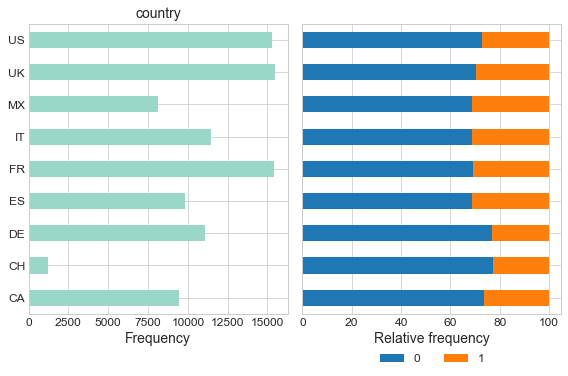

In [49]:
plot_freq_relfreq_hbar(df, 'country', 'is_referral')

In [54]:
def plot_hists(df, columns, target, number_rows, figsize=(12,8)):
    """
    Returns a histogram per column and target
    Parameters:
        columns: list of columns to plot
        target: str, which variable to plot per histograms
        number_rows: number of rows of subplots
    """
    fig = plt.figure()
    count = 1
    for column in columns:
        ax = fig.add_subplot(number_rows,3,count)
        df.groupby(target)[column].hist(bins=10, alpha=0.7, ax=ax, figsize=figsize)
        ax.set_ylabel('Frequency')
        ax.set_xlabel(column)
        ax.legend(df[target].unique())
        count+=1
    plt.tight_layout()

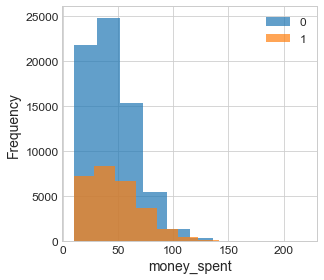

In [55]:
plot_hists(df, ['money_spent'], 'is_referral', 1, figsize=(12,4))

### 3.2 Plot numerical variables
<a id='num'></a>

In [ ]:
# scatter matrix
pd.scatter_matrix(df, c=y_train, figsize=(15, 15), marker='o',
                  hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

### 3.3 Correlation plot
<a id='cor'></a>

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(train_df.corr())
plt.show()

### 3.4 Check normality
<a id='norm'></a>

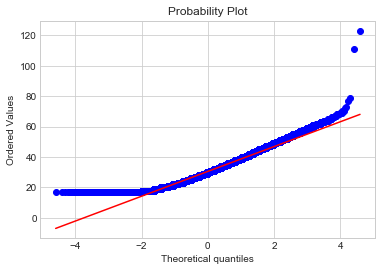

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df['age'], dist='norm', plot=ax)
plt.show()

In [25]:
stats.kstest(df['age'],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

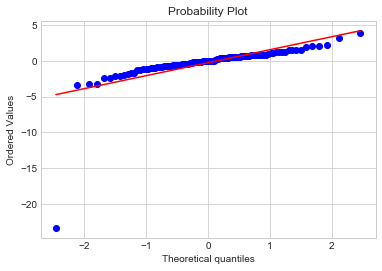

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = stats.t.rvs(3, size=100)
stats.probplot(x, plot=ax)
plt.show()

## 4. Prepare for model
<a id='premodel'></a>

In [ ]:
# convert string values into categories -> dummy coding
features_cat = ['country', 'source']
features_num = list(set(list(df.columns)) - set(features_cat))
feature_target = 'converted'
features_num.remove(feature_target)

X_num = df[features_num]
X_cat = df[features_cat]
for col in X_cat.columns:
    X_cat[col] = X_cat[col].astype('category')
X_cat = pd.get_dummies(X_cat)

# create model df
model_df = pd.concat([X_num, X_cat, df[feature_target]], axis=1)
model_df.head()

In [ ]:
# Craete a binary class based on another column
df['balance'] = [1 if b=='B' else 0 for b in df['balance']]

### Imbalanced classes

https://elitedatascience.com/imbalanced-classes

#### Up-sample minority class

In [ ]:
from sklearn.utils import resample

In [ ]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=5)   # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 

### Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# transform the data
scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Make sure you only scale the numerical variables

In [ ]:
X_train_num = scaler.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                                            'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

## 5. Model
<a id='model'></a>

### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [3]:
cross_val_score(model, X_trainCV, y_trainCV, scoring="accuracy")

### Grid search

Fitting the GridSearchCV object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
model = SVC()

In [ ]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring="f1_weighted")
grid_search.fit(X_trainCV, y_trainCV)
grid_search.best_params_

In [ ]:
# randomized grid search

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results

In [ ]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

### Linear regression

In [77]:
from sklearn.linear_model import LinearRegression

### Logistic regression

In [76]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(penalty='l1').fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

### Gradient booster

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

### 5.1 Performance
<a id='performance'></a>

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
# different metrics
from sklearn import metrics

In [ ]:
metrics.f1_score(y_test, y_pred)

In [ ]:
# accuracy
model.score(X_test, y_test)

In [ ]:
classification_report(y_test, y_pred)

In [ ]:
# confusion matrix, numbers
mat = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(mat, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'],
            square=True, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
# confusion matrix, relative
mat = confusion_matrix(y_test, y_pred_gb)
cm = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis] # divide by sum of actual label
sns.heatmap(cm, xticklabels=['Not converted', 'Converted'], yticklabels=['Not converted', 'Converted'],
            square=True, annot=True, fmt='.3f')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [ ]:
# feature importance
feature_imp_df = pd.DataFrame({'importance':gb.feature_importances_, 
              'feature':X_train.columns}).sort_values(by='importance', ascending=False)
feature_imp_df.head(10)

In [ ]:
# coefficients
pd.concat([pd.DataFrame(X_test.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)

In [ ]:
# roc curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, grid_search.decision_function(X_test))
#fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

In [ ]:
# AUC score
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]) # only predicted class 1
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

## 6. Recommendations
<a id='recommend'></a>

## Plotly

https://plot.ly/python/

In [69]:
from plotly import plotly as py
from plotly import offline
from plotly.graph_objs import *

In [ ]:
offline.init_notebook_mode(connected=True)

In [72]:
df.head()

,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH


In [75]:
x0 = df[df['is_referral']==0]['money_spent']
x1 = df[df['is_referral']==1]['money_spent']

trace1 = Histogram(x=x0, opacity=0.75, name='no referral')
trace2 = Histogram(x=x1, opacity=0.75, name='referral')

data = [trace1, trace2]
layout = Layout(
    title='Money spent',
    xaxis=dict(
        title='Value'
    ),
    yaxis=dict(
        title='Count'
    ),
    barmode='overlay'
)
fig = Figure(data=data, layout=layout)

offline.iplot(fig)